In [13]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dataset 🔥🔥

Let's use the Iris dataset from Scikit Learn

In [14]:
# Chargement des données Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Normalize dataset 📏📏

Before applying K-Means, let's normalize our dataset to avoid inflating our dataset since K-Means is using Euclidian Distance.

In [15]:
# Standardisation des données
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply K-Means 🚀🚀

Let's now apply K-Means on our dataset. As we already know there are 3 different types of flowers in our dataset (If you need confirmation, check out the dataset here 👉👉 Iris Description ).

Therefore, we will be initializing K=3. We'll prove that it is the optimal number later on in the course.

In [16]:
# Application de KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

Our model is initialized and converged! Let's check out the coordinates of each cluster centers

In [17]:
# Centres des clusters (inversés pour revenir aux coordonnées originales)
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Création d'un DataFrame pour les centres des clusters
matrix = pd.DataFrame(cluster_centers, columns=iris.feature_names).round(2)
matrix.index = [f"Cluster {i}" for i in range(len(cluster_centers))]  # Ajout d'étiquettes pour les clusters

# Création d'une heatmap avec Plotly Express
fig = px.imshow(
    matrix,
    text_auto=True,  # Annoter automatiquement les valeurs sur la heatmap
    labels={"x": "Caractéristiques", "y": "Clusters", "color": "Valeur"},
    title="Centres des Clusters - Heatmap"
)

# Ajustements supplémentaires pour le rendu
fig.update_layout(autosize=True, title_font_size=18)
fig.show()

If you want to check out how an unknown observation will be classified. You can simply use .predict()

In [18]:
import numpy as np

# Nouvelle donnée
d = np.array([[5, 2, 1, 0.1]])

# Appliquer la transformation standard pour normaliser la nouvelle donnée
d_scaled = sc.transform(d)

# Prédire le cluster pour la nouvelle donnée
cluster = kmeans.predict(d_scaled)

# Afficher le cluster auquel appartient la nouvelle donnée
print(f"La donnée {d[0]} appartient au cluster : {cluster[0]}")

La donnée [5.  2.  1.  0.1] appartient au cluster : 0


/Users/marie-sophiechenevier/Library/CloudStorage/Dropbox/8-Jedha/GitHub/2-Jedha_Fullstack/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



# Select K optimal clusters

## Elbow method 💪

Let's actually visualize how many clusters we should have using the Elbow Method.

WCSS pour K=1 --> 681.3706
WCSS pour K=2 --> 152.3479517603579
WCSS pour K=3 --> 78.8556658259773
WCSS pour K=4 --> 57.228473214285714
WCSS pour K=5 --> 49.827740558292284
WCSS pour K=6 --> 42.421545753097476
WCSS pour K=7 --> 34.420191786283894
WCSS pour K=8 --> 30.064593073593077
WCSS pour K=9 --> 28.715856536394465
WCSS pour K=10 --> 27.46211879129643


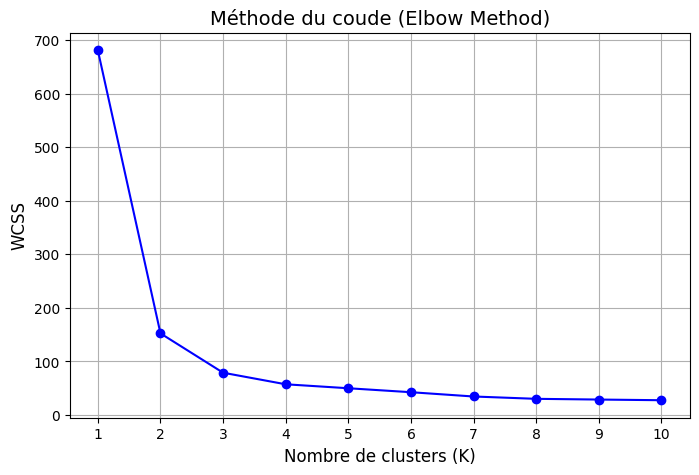

In [19]:
import matplotlib.pyplot as plt

# Initialisation des listes pour stocker les résultats
wcss = []
k_values = list(range(1, 11))  # Liste des valeurs de K de 1 à 10

# Boucle pour calculer WCSS pour chaque valeur de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(f"WCSS pour K={k} --> {wcss[-1]}")

# Visualisation de WCSS en fonction de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title("Méthode du coude (Elbow Method)", fontsize=14)
plt.xlabel("Nombre de clusters (K)", fontsize=12)
plt.ylabel("WCSS", fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

As you can see, after K=2 or K=3 WCSS is not decreasing a whole lot.

# Silhouette 👥

Let's now double check with the Silhouette method. We will use Sklearn again to get silhouette scores.

Score de silhouette pour K=2 --> 0.6810
Score de silhouette pour K=3 --> 0.5512
Score de silhouette pour K=4 --> 0.4981
Score de silhouette pour K=5 --> 0.4610
Score de silhouette pour K=6 --> 0.3357
Score de silhouette pour K=7 --> 0.3569
Score de silhouette pour K=8 --> 0.3597
Score de silhouette pour K=9 --> 0.3262
Score de silhouette pour K=10 --> 0.3258


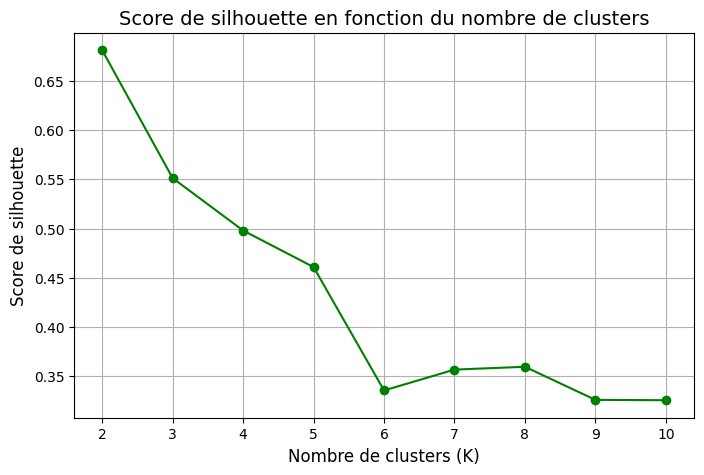

In [20]:
from sklearn.metrics import silhouette_score

# Initialisation des listes pour stocker les résultats
silhouette_scores = []
k_values = list(range(2, 11))  # Les valeurs de K commencent à 2

# Calcul des scores de silhouette pour chaque valeur de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Score de silhouette pour K={k} --> {score:.4f}")

# Visualisation des scores de silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.title("Score de silhouette en fonction du nombre de clusters", fontsize=14)
plt.xlabel("Nombre de clusters (K)", fontsize=12)
plt.ylabel("Score de silhouette", fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

Here silhouette method suggests that we should choose K=2 instead of 3.

In any case, that is why you should use both methods and choose according to your business knowledge and intuition.